In [1]:
# Importing pandas
#import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving AB_Test_Results (2).xlsx to AB_Test_Results (2).xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/AB_Test_Results (2).xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [6]:
df.VARIANT_NAME.unique()

array(['variant', 'control'], dtype=object)

In [15]:
df = df[df.REVENUE < 50]

In [16]:
df.describe()

,USER_ID,REVENUE
count,9997.000000,9997.000000
mean,4981.231670,0.068257
std,2890.815394,0.929898
min,2.000000,0.000000
25%,2468.000000,0.000000
50%,4962.000000,0.000000
75%,7513.000000,0.000000
max,10000.000000,41.530000


In [17]:
A = df.VARIANT_NAME.groupby(df.VARIANT_NAME == "control").count()
B = df.VARIANT_NAME.groupby(df.VARIANT_NAME == "variant").count()
print(A)
print(B)


VARIANT_NAME
False    5014
True     4983
Name: VARIANT_NAME, dtype: int64
VARIANT_NAME
False    4983
True     5014
Name: VARIANT_NAME, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

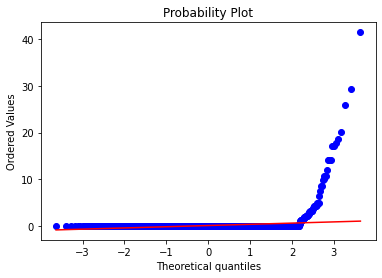

In [21]:
import pylab
import scipy.stats as stats
stats.probplot(df[df.VARIANT_NAME == 'control'].REVENUE, dist = 'norm', plot= pylab)
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

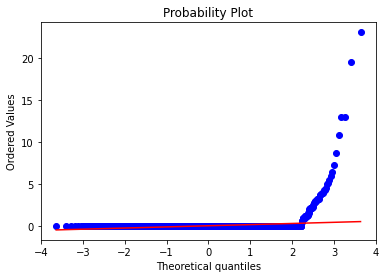

In [22]:
stats.probplot(df[df.VARIANT_NAME == 'variant'].REVENUE, dist = 'norm', plot= pylab)
pylab.show

In [23]:
stats.shapiro(df[df.VARIANT_NAME == 'variant'].REVENUE)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.04861670732498169, pvalue=0.0)

In [24]:
stats.shapiro(df[df.VARIANT_NAME == 'control'].REVENUE)

ShapiroResult(statistic=0.05089569091796875, pvalue=0.0)

In [25]:
from scipy.stats import kstest
print(kstest(df['REVENUE'][df.VARIANT_NAME == 'control'], 'norm'))
print(kstest(df['REVENUE'][df.VARIANT_NAME == 'variant'], 'norm'))

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)


In [26]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df.VARIANT_NAME == 'control'].REVENUE, 
             df[df.VARIANT_NAME == 'variant'].REVENUE)

MannwhitneyuResult(statistic=12516548.0, pvalue=0.4248353974758958)

На основании проведенных исследований статистически значемых изменений между двумя группами не обнаружено. Изменения вводить не рекомендуется